In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm

Using TensorFlow backend


In [1]:
!pip install keras-cv keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 16.5 MB/s eta 0:00:00


In [3]:
pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc", bounding_box_format="xywh"
)

100%|██████████| 5.37k/5.37k [00:00<00:00, 6.16MB/s]
100%|██████████| 136M/136M [00:03<00:00, 43.9MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


40187/40187 [==============================] - 0s 0us/step


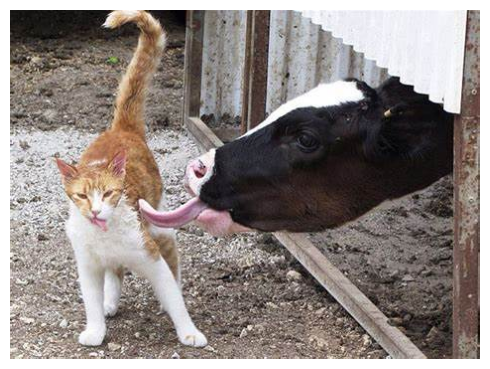

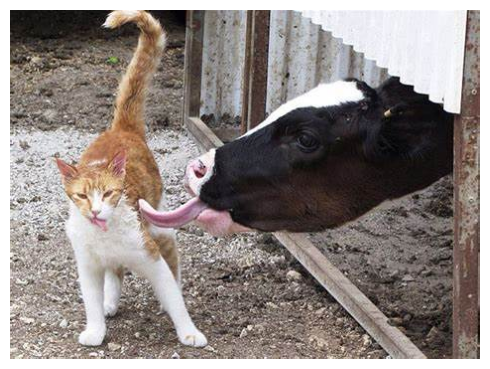

In [4]:
url = 'https://th.bing.com/th/id/OIP.nubEuSgb505UczP9So1kIQAAAA?rs=1&pid=ImgDetMaing'
filepath = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1,h,w,c)

visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows = 1,
    cols = 1,
    scale = 5
)

In [5]:
inference_resizing = keras_cv.layers.Resizing(
    640,640, pad_to_aspect_ratio=True,bounding_box_format="xywh"
)

In [6]:
image_batch = inference_resizing(batch)

In [7]:
label_names = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
id2label = {k: v for k, v in enumerate(label_names)}

1/1 [==============================] - 36s 36s/step


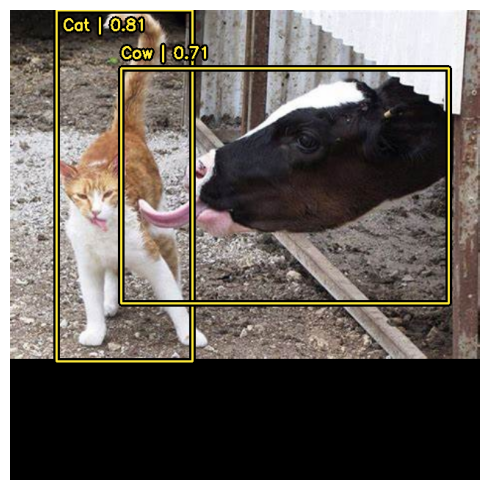

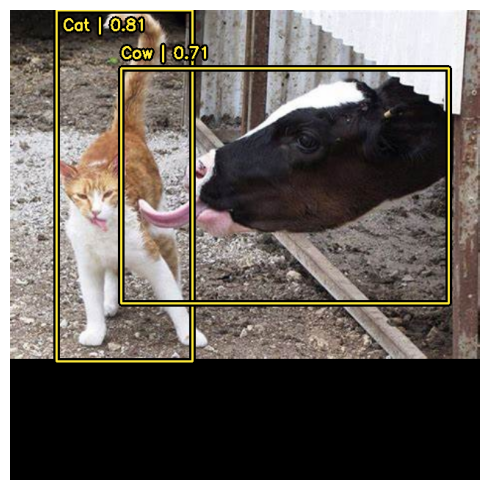

In [8]:
y_pred = pretrained_model.predict(image_batch)

visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

In [9]:
url = 'https://i.ytimg.com/vi/tHisc423jtU/maxresdefault.jpg'
filepath = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)
image_batch = inference_resizing(batch)

156523/156523 [==============================] - 0s 0us/step


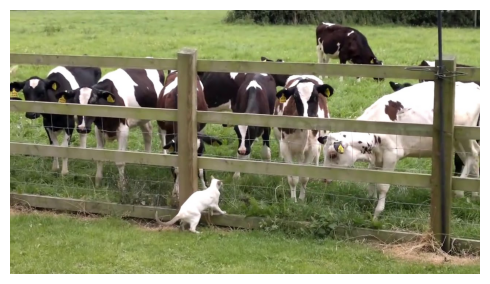

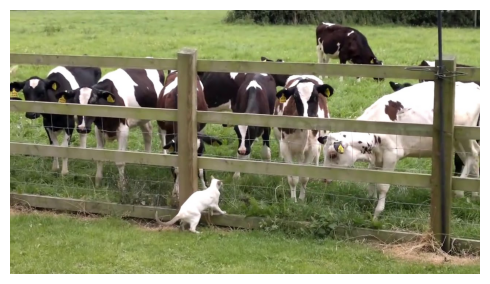

In [10]:
visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

1/1 [==============================] - 5s 5s/step


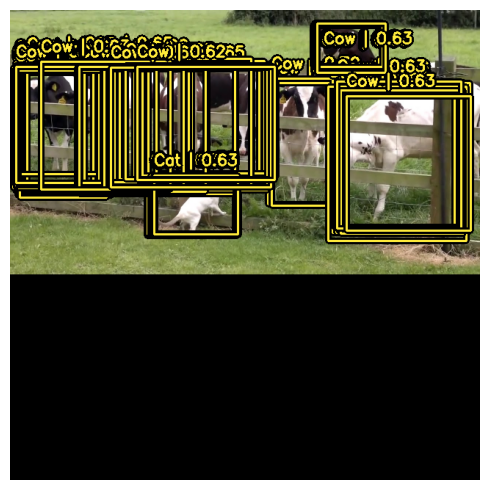

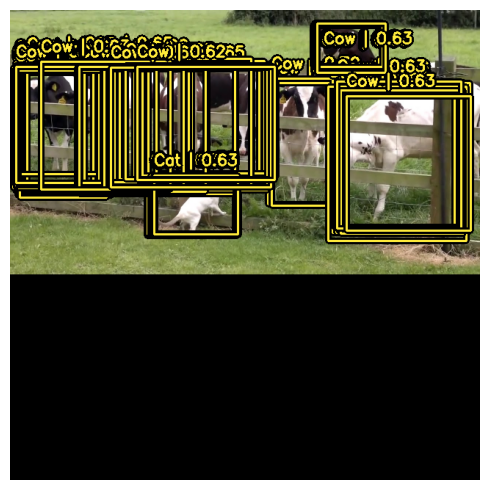

In [11]:
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=1.0,
    confidence_threshold=0.0,
)
pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

1/1 [==============================] - 7s 7s/step


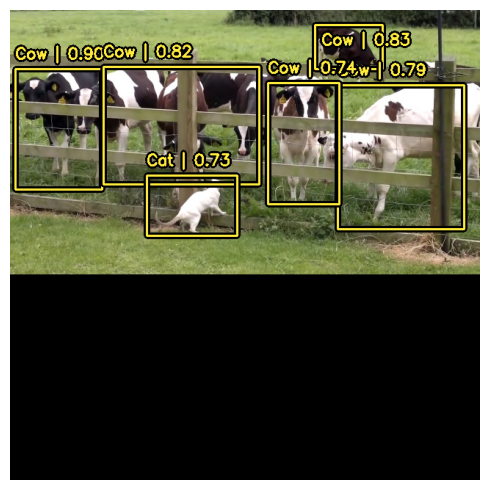

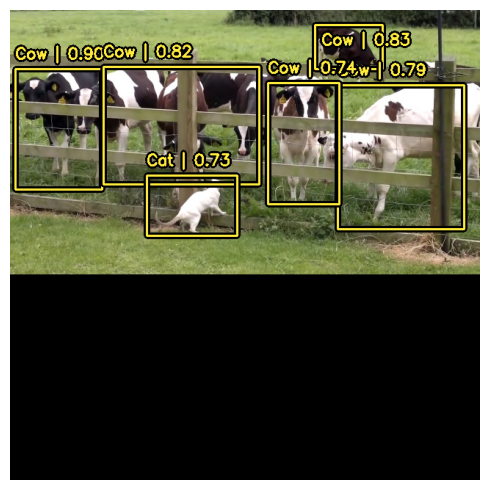

In [12]:
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=0.2,
    confidence_threshold=0.7,
)
pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

In [18]:
!pip install requests

In [19]:
import requests

In [21]:
from io import BytesIO

In [26]:
# Assuming 'out' contains the output from the model

_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

# Load ImageNet class names
import json
!wget https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json
with open('imagenet-simple-labels.json') as f:
    classes = json.load(f)

# Print the top 5 predictions
print([(classes[idx], percentage[idx].item()) for idx in indices[0][:5]])


--2024-03-24 06:27:27--  https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14209 (14K) [text/plain]
Saving to: ‘imagenet-simple-labels.json’

imagenet-simple-lab 100%[===================>]  13.88K  --.-KB/s    in 0s      

2024-03-24 06:27:27 (40.4 MB/s) - ‘imagenet-simple-labels.json’ saved [14209/14209]

[('Whippet', 32.58836364746094), ('borzoi', 6.589735507965088), ('Saluki', 5.1413350105285645), ('Australian Kelpie', 4.407504081726074), ('Staffordshire Bull Terrier', 4.128248691558838)]


In [27]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load a pretrained ResNet-50 model
model = models.resnet50(pretrained=True)
model.eval()

# Define transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Fetch the image from the URL
img_url = 'https://i.ytimg.com/vi/tHisc423jtU/maxresdefault.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Now apply the transform to the image
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)


# Perform inference
with torch.no_grad():
    out = model(batch_t)

# Print the top 5 categories per the ImageNet classes
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[('Whippet', 32.58836364746094),
 ('borzoi', 6.589735507965088),
 ('Saluki', 5.1413350105285645),
 ('Australian Kelpie', 4.407504081726074),
 ('Staffordshire Bull Terrier', 4.128248691558838)]

finetuning

In [33]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import requests

class SimpleOnlineDataset(Dataset):
    def __init__(self, img_urls, transform=None):
        """
        Args:
            img_urls (list): List of URLs of the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.img_urls = img_urls
        self.transform = transform

    def __len__(self):
        return len(self.img_urls)

    def __getitem__(self, idx):
        response = requests.get(self.img_urls[idx])
        img = Image.open(response.raw)

        if self.transform:
            img = self.transform(img)

        # Assuming binary classification for simplicity, you might need to adjust this
        label = 0  # Placeholder label, adjust as needed

        return img, label


In [34]:
# Define your transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Assuming this is your image URL
img_urls = ['https://th.bing.com/th/id/OIP.nubEuSgb505UczP9So1kIQAAAA?rs=1&pid=ImgDet']

# Instantiate the dataset
dataset = SimpleOnlineDataset(img_urls=img_urls, transform=transform)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)


In [38]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define your transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Split your dataset into training and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Applying the appropriate transforms to validation dataset
val_dataset.dataset.transform = data_transforms['val']


# Now you can use dataloaders in your training loop


Training a image classifier from scratch

In [45]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a transformation to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training dataset (for example, MNIST)
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create the DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)


100%|██████████| 9912422/9912422 [00:00<00:00, 130022020.47it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85850952.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41197163.31it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5918151.22it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [51]:
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define your dataset, DataLoader, criterion, and optimizer
# train_loader = DataLoader(...)
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [52]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm
import json

In [53]:
path_to_downloaded_file = keras.utils.get_file(
    origin="https://archive.org/download/self-driving-car.v-3-fixed-small.coco/Self%20Driving%20Car.v3-fixed-small.coco.zip",
    extract=True,
)


1226687196/1226687196 [==============================] - 669s 1us/step


In [54]:
path_to_downloaded_file

'/root/.keras/datasets/Self%20Driving%20Car.v3-fixed-small.coco.zip'

In [55]:
!unzip '/root/.keras/datasets/Self%20Driving%20Car.v3-fixed-small.coco.zip' -d .


Streaming output truncated to the last 5000 lines.
 extracting: ./export/1478900100165707353_jpg.rf.mLJlW3Cf3VoVKjXY6jgh.jpg  
 extracting: ./export/1478900100737478288_jpg.rf.2bb35a1222e15394de7033687f69065c.jpg  
 extracting: ./export/1478900100737478288_jpg.rf.nbrgBfnnhHP0mwGGKfnW.jpg  
 extracting: ./export/1478900101309115339_jpg.rf.2508668be11307c87ff954cf21544d10.jpg  
 extracting: ./export/1478900101309115339_jpg.rf.OsDb7MLdxcxdujSvvLyR.jpg  
 extracting: ./export/1478900101879688623_jpg.rf.81c3be06336e0ae02178f47713d58e6f.jpg  
 extracting: ./export/1478900101879688623_jpg.rf.v2nxcO0TVyrQn6VcGa1D.jpg  
 extracting: ./export/1478900102451943901_jpg.rf.4kwTUlpUEj4Jc9ubppWJ.jpg  
 extracting: ./export/1478900102451943901_jpg.rf.bb6b07a82d52b84fdcc5593bc581128c.jpg  
 extracting: ./export/1478900103022167413_jpg.rf.RQ4U0fNDAki55lA9GdEG.jpg  
 extracting: ./export/1478900103022167413_jpg.rf.e6e06a954b166e3767e86f06099eae5c.jpg  
 extracting: ./export/1478900103593304251_jpg.rf.VMyb